<a href="https://colab.research.google.com/github/JGH94/Python_BIT_USA/blob/main/Python_BIT_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%pushd book-materials
# 참고 https://github.com/wesm/pydata-book
# 셋팅
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter

plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

[Errno 2] No such file or directory: 'book-materials'
/content


In [31]:
path = "/content/sample_data/example.txt" 
print(open(path).readline())
records = [json.loads(line) for line in open(path)] # json 형태로 변환
# 표준 시간대(tz)의 빈도를 구함
time_tz = [rec['tz'] for rec in records if 'tz' in rec]
print(time_tz[:10])
# New_York 시간이 표준 시간대로 가장 많이 사용
# 값이 존재하지 않는것이 521개 
counts_ = Counter(time_tz) 
for x ,y in counts_.most_common(10):
  print(x , y);

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }

['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '']
America/New_York 1251
 521
America/Chicago 400
America/Los_Angeles 382
America/Denver 191
Europe/London 74
Asia/Tokyo 37
Pacific/Honolulu 36
Europe/Madrid 35
America/Sao_Paulo 33


In [36]:
# 간단한 방법
data_ = pd.DataFrame(records)
data_.info()
print('-----------------------------')
print(data_['tz'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

([<matplotlib.axis.YTick at 0x7fd4b2577350>,
 [Text(0, 0, 'America/New_York'),
  Text(0, 0, 'Unknown'),
  Text(0, 0, 'America/Chicago'),
  Text(0, 0, 'America/Los_Angeles'),
  Text(0, 0, 'America/Denver'),
  Text(0, 0, 'Missing'),
  Text(0, 0, 'Europe/London'),
  Text(0, 0, 'Asia/Tokyo'),
  Text(0, 0, 'Pacific/Honolulu'),
  Text(0, 0, 'Europe/Madrid')])

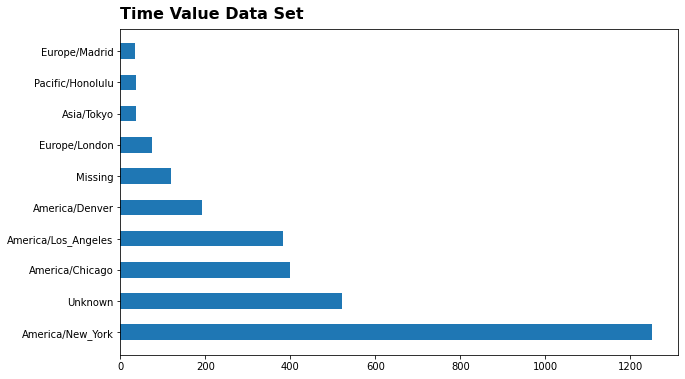

In [65]:
# 없는 값의 Column을 Unknown으로 설정하고
# 데이터 시각화 
new_data= data_['tz'].fillna('Missing')
new_data[new_data == ''] = 'Unknown'
new_data_count = new_data.value_counts() 
X_ = []
Y_ = []
for x,y in new_data_count[:10].items():
  X_.append(x)
  Y_.append(y)  
x = np.arange(10)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.barh(x, Y_, height = 0.5)  
plt.title('Time Value Data Set ', fontdict=title_font, loc='left', pad=10)
plt.yticks(x, X_)